<a href="https://colab.research.google.com/github/victorgmoreno/agitROS/blob/main/Regression_CatNDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Desafio Prático de Machine Learning**
**Instituto CTS**

Problemas de classificação são uma aplicação bastante comum de algoritmos de aprendizagem de máquina, onde Redes Neurais tendem a se destacar sobretudo quando são utilizados dados não estruturados. Nesse tipo de problema, os exemplos são divididos em classes e cada classe é associada a um número inteiro. Nesse contexto, a função do classificador é associar cada exemplo de entrada à sua respectiva classe. Algumas tarefas de classificação são a identificação da presença de pessoas em uma imagem, a presença de anomalias em exames médicos ou ainda a identificação de componentes com defeito na linha de produção.


Nessa tarefa, espera-se a concepção de um modelo de Aprendizagem de Máquina capaz de classificar uma dada imagem quanto à presença de cães ou gatos. Para isso, será utilizado o banco de dados [Cats and Dogs Breeds Classification Oxford Dataset](https://www.kaggle.com/zippyz/cats-and-dogs-breeds-classification-oxford-dataset), que contém mais de 7 mil imagens de cães e gatos de raças diversas. Nesse banco de dados, as imagens de gatos têm seu nome iniciado com letra maiúscula (i.e. Abyssinian_34.jpg) e as imagens de cães têm o nome iniciado com letra minúscula (i.e. beagle_1.jpg). O banco de dados pode ser acessado a partir da plataforma Kaggle a partir do link acima.

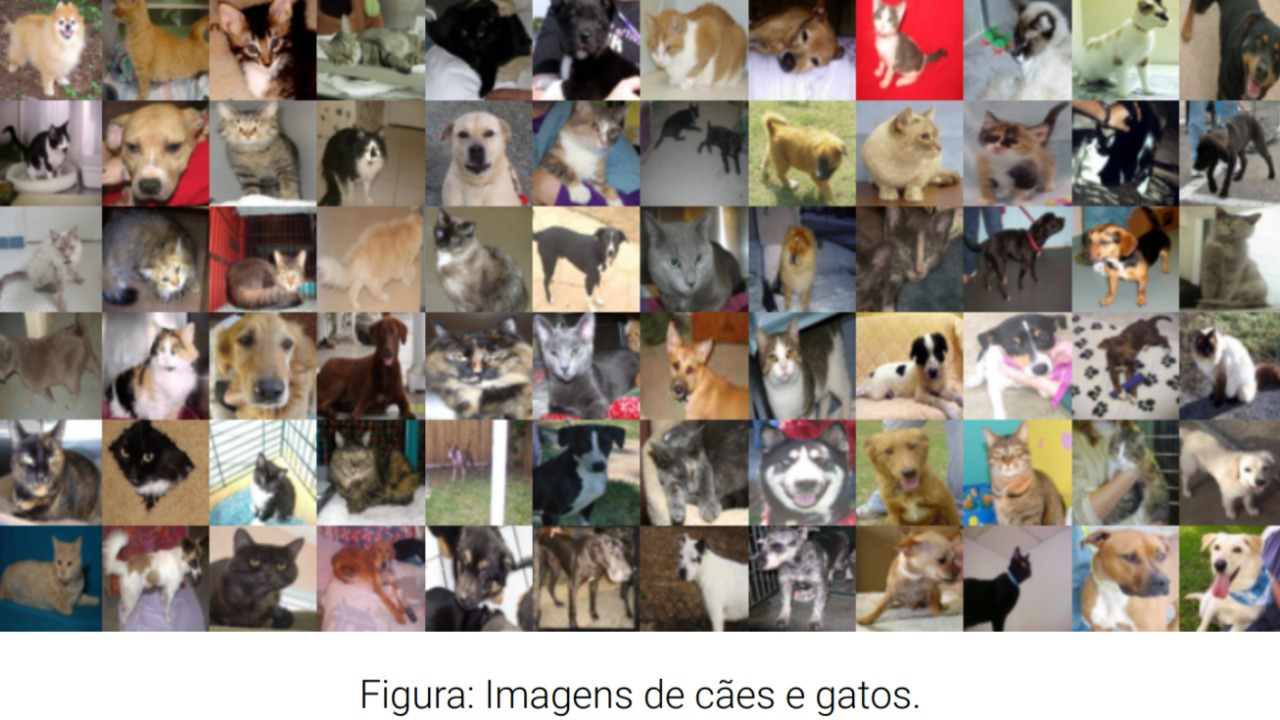

**Atividades:**
1. Escreva um algoritmo em Python que realize o treinamento de um modelo
para a classificação de imagens quanto à presença de cães ou gatos.
2. Apesar de o dataset ser dividido em classes para cada raça de cão/gato,
só é necessário determinar se a imagem contém um cão ou um gato.
3. Use quantas imagens precisar, mas atente-se à divisão da própria base de
dados quanto aos conjuntos de treino e teste.
4. Atente-se a um código limpo, organizado, documentado e com ideias
claras da solução proposta.
5. Caso mais de um modelo seja produzido, comente sobre os resultados
obtidos, explicitando qual deles funcionou melhor e o porquê.
6. Na falta de uma GPU para o treinamento, recomenda-se o uso do Kaggle
ou do Google Colab.


**Instruções de entrega:**

● A entrega será feita por meio do site GitHub (você poderá utilizar a sua
conta pessoal ou criar uma nova no site).

● Você deverá “subir” as soluções para lá até a data especificada no e-mail
em que foi enviado esta prova.

● Você deverá enviar um e-mail (em resposta ao e-mail em que foi enviado a
prova para você) informando que já subiu a solução para o Github. Neste
e-mail você deve informar o endereço de acesso do seu repositório.

Obs: Uma vez finalizadas as atividades acima, encoraja-se o desenvolvimento de um modelo que também classifique as imagens quanto à raça. Considere cada raça como uma classe separada, independentemente de ser raça de cão ou gato.

Bibliografia Sugerida: François Chollet - Deep Learning with Python.

---


## **Resolução do desafio**

---

# **2. Importando os pacotes e bibliotecas**

Para resolução do problema de processamento digital de imagem e machine learning, é necessário importar certos pacotes. No problema, são usados:

In [ ]:
import os, cv2, itertools 
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import PIL.Image

%matplotlib inline


# **3. Extraindo o arquivo do url Kaggle**

Agora, é necessário entrar no url do kaggle e baixar o dataset para o Google Colab. Além disso, o arquivo é compactado, portando precisa-se descompactá-lo para acessar cada imagem.

In [ ]:
# Procedimento para extração do dataset que está no kaggle

! pip install kaggle  # é necessário para baixar o dataset
! mkdir ~/.kaggle  # criando uma pasta
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Acessando a URL do kaggle para download
! kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

# Descompactando o dataset
! unzip cats-and-dogs-breeds-classification-oxford-dataset

# **4. Organizando os dados baixados**

Para evitar problemas de leitura das imagens durante o código, é preciso organizar todos os diretórios e arquivos. 
Além disso, nesse dataset existem alguns arquvios vazios, com mais de um canal ou com formato diferente do .jpg, assim é necessário haver uma filtragem.

In [106]:
# Transformando os diretorios de cada imagem em uma lista de diretorios
imageDiretorio = os.listdir('/content/images/images')

# Alguns arquivos no dataset não estão no formato JPG, para sanar isso:
imageDiretorio = ([image for image in imageDiretorio if image.split('.')[-1] == 'jpg'])

print("Existem",len(imageDiretorio), "arquivos no formato .jpg")


# Para começar a organizar os dados, precisa-se criar algumas variáveis globais

canais = 3
linhas = 128
colunas = 128
size = (linhas, colunas)

Existem 7390 arquivos no formato .jpg


Fazendo a filtragem dos arquivos, é necessário classificar os gatos e cachorros de acordo com o diretório de cada imagem. 

*Imagens que começam com maiúsculo: Gatos (0)*

Exemplo: Abyssinian_34.jpg

*Imagens que começam com minúsculo: Cachorros (0)*

Exemplo: beagle_1.jpg

In [107]:
# Agora, separaremos as imagens de gatos e de cachorros para a máquina
gatosDiretorio = []
cachorrosDiretorio = []

for i in range(0, len(imageDiretorio)):
  if imageDiretorio[i][0].isupper():  # se a primeira letra é maíuscula
    gatosDiretorio.append(imageDiretorio[i])
  else:
    cachorrosDiretorio.append(imageDiretorio[i])

Ao separar duas listas, uma com todos os gatos e outra com todos os cachorros, é necessário criar outra lista, contendo apenas zeros e uns. 

Nessa terceira lista, o 0 representará gato e o 1 representará cachorro.

In [108]:
# GATO = 0; CACHORRO = 1
# Criando uma lista de apoio como se fosse uma matriz de identidade
ygatos = np.zeros(len(gatosDiretorio), dtype=int)  
ycachorros = np.ones(len(cachorrosDiretorio), dtype=int)

# Agora, concatena-se os gatos e cachorros em um único array para treiná-los
X_train = gatosDiretorio+cachorrosDiretorio  # X: diretórios de cada imagem
Y_train = np.concatenate((ygatos, ycachorros))  # Y: matriz identidade

# **5. Pré Processamento**

É necessário fazer a leitura das imagens, bem como o seu processamento.

Além disso, foi necessário fazer uma conversã de rgba para rgb, pois algumas imagens possuem mais de 3 canais, podendo dar bugs futuros. 

Também foi dado um reSize para que as imagens se mantenham num formato padrão durante todo o processamento.

In [109]:
# Criando uma função para visualizar as imagens, quando quisermos

def read_image(caminhoArquivo):
  rgba_image = PIL.Image.open("/content/images/images/" + caminhoArquivo)  # forma de ler a imagem
  rgb_image = rgba_image.convert('RGB')  # espécie de filtro para fixar 3 canais
  rgb_image = np.array(rgb_image)
  return cv2.resize(rgb_image, size, interpolation=cv2.INTER_CUBIC)
  # retornando a imagem com resize definido

In [110]:
def prep_data(images, targets):
  m = len(images)
  n_x = linhas*colunas*canais
  
  X = np.ndarray((n_x,m), dtype=np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  count = 0 
  
  for i, (image_file, target) in enumerate(zip(images, targets)):
    image = read_image(image_file)
    reshape = image.reshape((n_x,1))
    squeeze = np.squeeze(reshape)

    X[:,i] = squeeze
    if target == 0:
      y[0,i] = 0
    elif target == 1:
      y[0,i] = 1

  return X,y

Agora, chama-se a função “prep_data()” para preparar nossos dados de treinamento no formato necessário para o método Scikit Learn Logistic Regression.

Lembrando que o arquivo terá 49152 linhas = 128*128*3 (colunas*canais*linhas), por 7390 colunas (quantidade de imagens no dataset)

Uma única imagem (1 de 7390) é transformada em um conjunto de informações
ao longo de 49152 linhas. Ou seja, é uma imagem por coluna. 




In [111]:
X, y = prep_data(X_train, Y_train)


X.shape is (49152, 7390)


# **6. Iniciando o treinamento e teste**


Agora, é necessário dividir as imagens usadas no treino e as imagens usadas no teste. 

Por isso, cria-se quatro variáveis para receber esse valor. É necessário fazer a Transposta da matriz X para se obter os dados corretamente e não invertido. 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X.T, y.squeeze(), test_size=0.2, random_state=42)


Analisando os dados de treinamento e teste e suas respectivas quantidades.

In [113]:
# Analisando o formato dos dados de treino e teste

print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (5912, 49152)
Test shape: (1478, 49152)


Uma função show_image(X, y, idx) foi criada para mostrar a imagem para o usuário. Os parametros dessa função receberão os valores de X_train, y_train, o índice da imagem e a própria imagem.

In [114]:
# Função de visualização de imagem

def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((linhas, colunas, canais))
  plt.figure(figsize=(12,6))
  plt.imshow(image)
  animal = 'Cachorro' if y[idx] == 1 else 'Gato'
  plt.title("Isso é um {}".format(animal))
  plt.show()


Para testar, plotamos duas imagens com legenda definindo o tipo do animal.



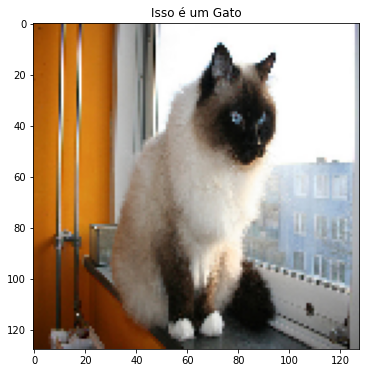

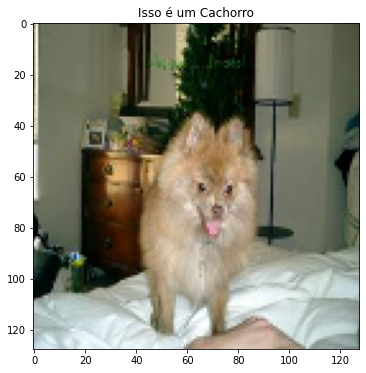

In [115]:
# Testando se está pegando a imagem corretamente e a sua respectiva legenda

show_images(X_train, y_train, 5000)
show_images(X_train, y_train, 500)

Fazemos um plot, apenas para comparar a quantidade de gatos e cachorros no dataset.

<BarContainer object of 2 artists>

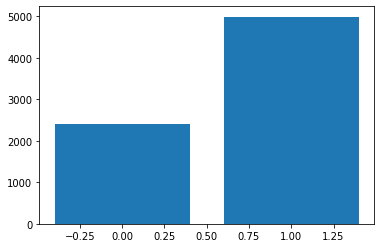

In [116]:
# Vendo como está o balanceamento de gato e cachorro

unique, counts = np.unique(y, return_counts=True)

plt.bar(unique, counts)

# **7. Implementação de regressão logística**

O modelo de regressão logística foi implementado usando o Scikit Learn. Esse modelo busca relacionar as características e a probabilidade de ocorrer um determinado resultado. 

In [ ]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression()  # Classificador 
classificador.fit(X_train, y_train)  # Treinando o modelo usando o método fit da instância

In [118]:
y_pred = classificador.predict(X_test)

Para finalizar, usamos os scores para analisar a precisão e acurácia do modelo. 

In [119]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
print("Precisão do modelo: {:.2f}%".format(classificador.score(X_train, y_train)*100))
print("ACC:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))

Precisão do modelo: 92.79%
ACC: 0.5987821380243572
F1 Score: 0.7030545818728092
MCC: 0.08598269400687


Por fim, uma matriz de confusão é usada para fazer a análise do modelo como um todo. 

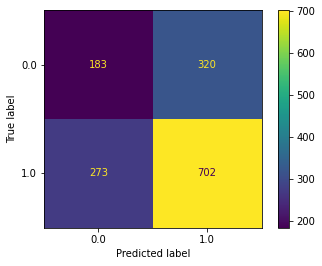

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=classificador.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classificador.classes_)
disp.plot()

# **8. Conclusão**

Foi escolhido o modelo de regressão logística devido a sua simplicidade. Como estamos fazendo uma análise de acurácias, testando a capacidade de certos modelos e suas respectivas precisões, é possível perceber que esse é um modelo importante para começar a solucionar o problema. 

Todavia, é evidente que o modelo de regressão logística não é o ideal para se resolver problemas de visão computacional. Portanto, mais a frente, faremos um outro modelo com Convolutional Neural Network (CNN). Esse sim é um modelo ideal para a resolução do problema. 